In [ ]:
from array_randomizer import generate_layout, export_layout, export_metadata, plot_plate, plot_negative_uniqueness, validate_layout

data = generate_layout(
    strain_names=[f"S{i:03d}" for i in range(1, 161)], # put a list of the names here. import from csv with pandas and convert to list
    n_rows=8, n_columns=12, n_negatives=3, n_replicates=3, random_seed=42
)

df_long = export_layout(data, format='long')
df_long


,replicate_id,plate_id,row_index,col_index,row_label,col_label,well_id,content,is_inner,neighbor_count,position_type
0,0,plate_0,0,0,A,1,A1,S001,False,2,edge
1,0,plate_0,0,1,A,2,A2,S002,False,3,edge
2,0,plate_0,0,2,A,3,A3,S003,False,3,edge
3,0,plate_0,0,3,A,4,A4,S004,False,3,edge
4,0,plate_0,0,4,A,5,A5,S005,False,3,edge
...,...,...,...,...,...,...,...,...,...,...,...
571,2,plate_1,7,7,H,8,H8,None,False,0,empty
572,2,plate_1,7,8,H,9,H9,None,False,0,empty
573,2,plate_1,7,9,H,10,H10,None,False,0,empty
574,2,plate_1,7,10,H,11,H11,None,False,0,empty


In [14]:
df_wide = export_layout(data, format='wide')
print(df_wide.index)
df_wide


RangeIndex(start=0, stop=6, step=1)


well_id,replicate_id,plate_id,A1,A2,A3,A4,A5,A6,A7,A8,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,0,plate_0,S001,S002,S003,S004,S005,S006,S007,S008,...,S084,S085,S086,S087,S088,S089,S090,S091,S092,S093
1,0,plate_1,S094,S095,S096,S097,S098,S099,S100,S101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,plate_0,S033,S026,S061,S065,S053,S038,S021,S025,...,S050,S051,S056,S041,S022,S072,S078,S062,S019,S077
3,1,plate_1,S115,S099,S132,S125,S119,S143,S111,S120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,plate_0,S082,S092,S011,S090,S010,S089,S008,S004,...,S068,S088,S023,S079,S024,S013,S085,S002,S087,S036
5,2,plate_1,S120,S123,S100,S153,S159,S131,S096,S130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Convert positions for a plate and replicate into

In [19]:
import pandas as pd
plate_pattern = pd.DataFrame(df_wide.loc[0, "A1":].to_numpy().reshape(8, 12))
plate_pattern


,0,1,2,3,4,5,6,7,8,9,10,11
0,S001,S002,S003,S004,S005,S006,S007,S008,S009,S010,S011,S012
1,S013,S014,S015,S016,S017,negative,S018,S019,S020,S021,S022,S023
2,S024,S025,S026,S027,S028,S029,S030,S031,S032,S033,S034,S035
3,S036,S037,S038,S039,S040,S041,S042,S043,S044,S045,S046,S047
4,S048,S049,S050,S051,S052,S053,S054,S055,S056,S057,S058,S059
5,S060,S061,S062,S063,negative,S064,S065,S066,S067,S068,S069,S070
6,S071,S072,S073,S074,S075,S076,S077,S078,S079,negative,S080,S081
7,S082,S083,S084,S085,S086,S087,S088,S089,S090,S091,S092,S093


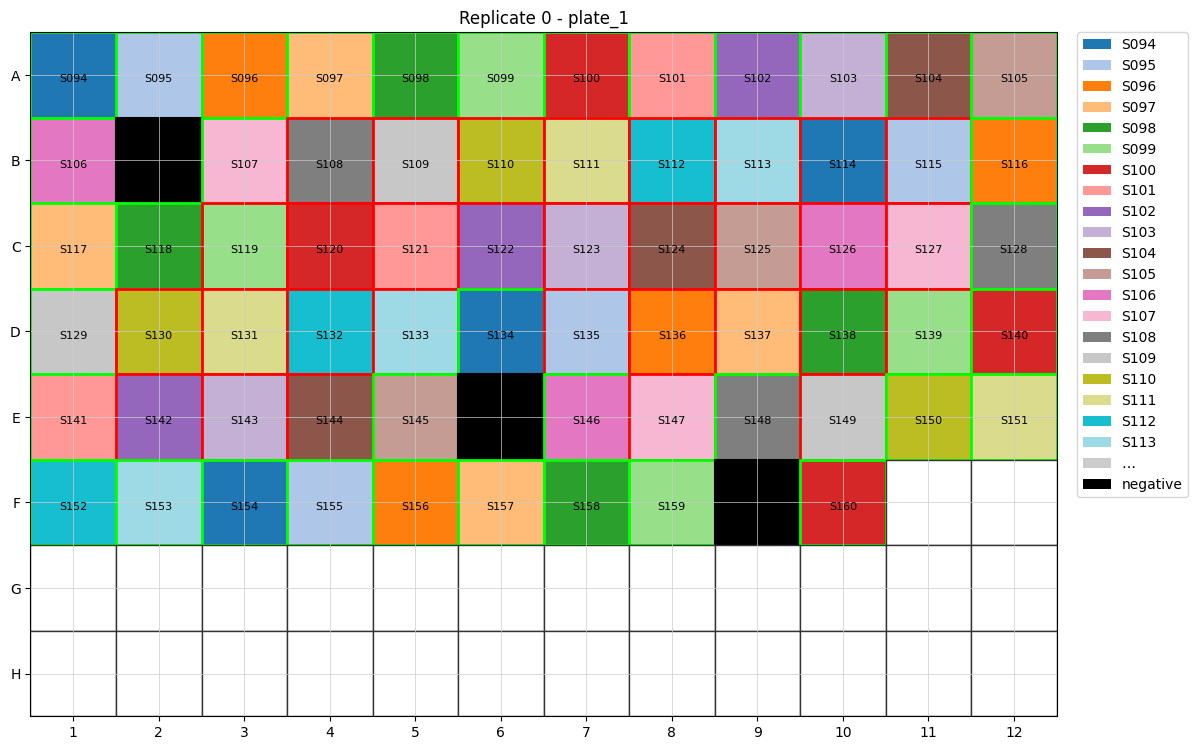

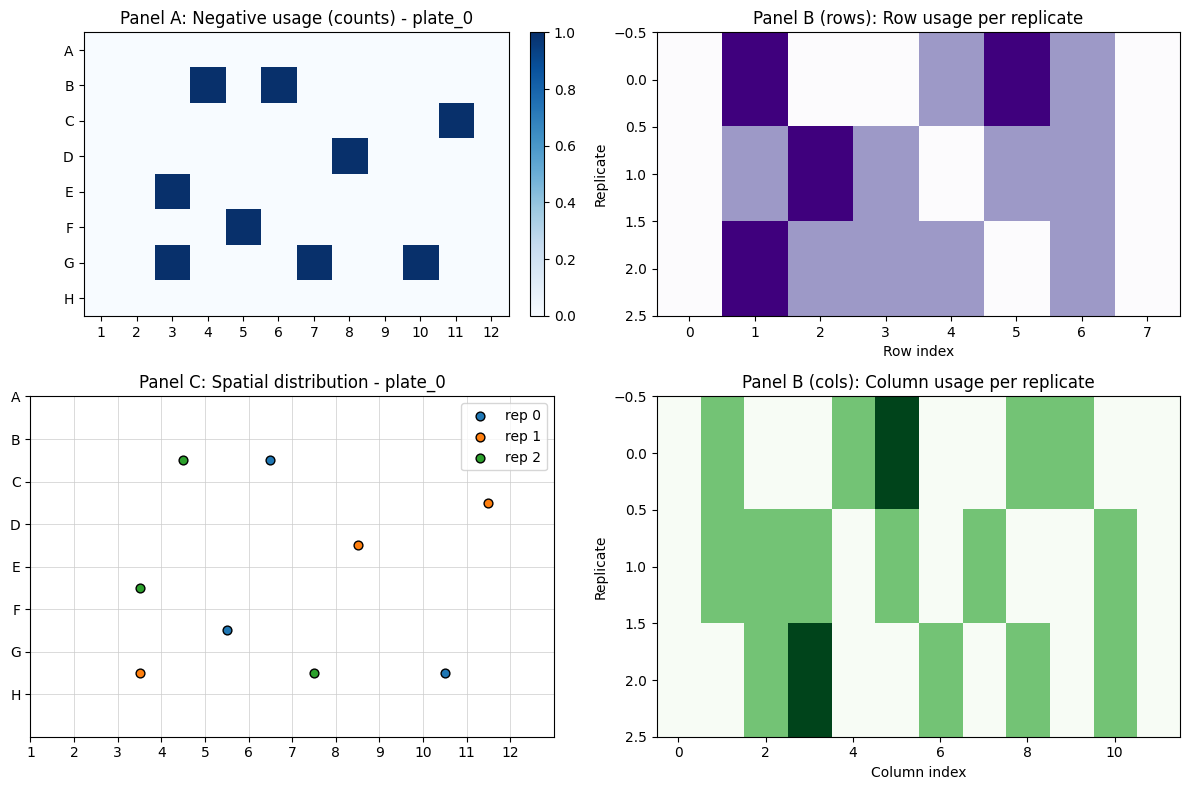

In [11]:

meta = export_metadata(data)
checks = validate_layout(data)

fig, ax = plot_plate(data, replicate_id=0, plate_id='plate_1')
fig2 = plot_negative_uniqueness(data)


In [12]:
from array_randomizer import validate_layout
validate_layout(data)


{'negative_uniqueness': True,
 'negative_spacing': True,
 'negative_row_col_unique': True,
 'strain_plate_consistency': True,
 'strain_name_integrity': True,
 'alternation_feasibility': True,
 'array_completeness': True,
 'export_consistency': True}